# 01 MNIST 딥러닝 모델 예제

## 모듈 임포트

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

## 데이터 로드 및 전처리

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28)  레이블: (60000,)
학습용 데이터: (42000, 28, 28)  레이블: (42000,)
검증용 데이터: (18000, 28, 28)  레이블: (18000,)
테스트용 데이터: (10000, 28, 28)  레이블: (10000,)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9152\2577002219.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


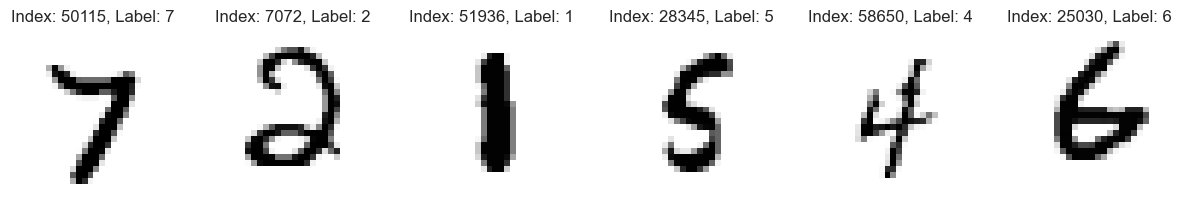

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  plt.imshow(img)

In [4]:
print(y_train[0])

4


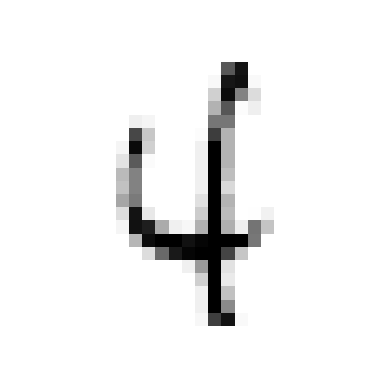

In [5]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [7]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## 모델구성

In [8]:
model = models.Sequential()
model.add(keras.Input(shape=(28, 28), name='input'))
model.add(layers.Flatten(input_shape=[28, 28], name='flatten'))
model.add(layers.Dense(100, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(32, activation='relu', name='dense3'))
model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87374 (341.30 KB)
Trainable params: 87374 (341.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


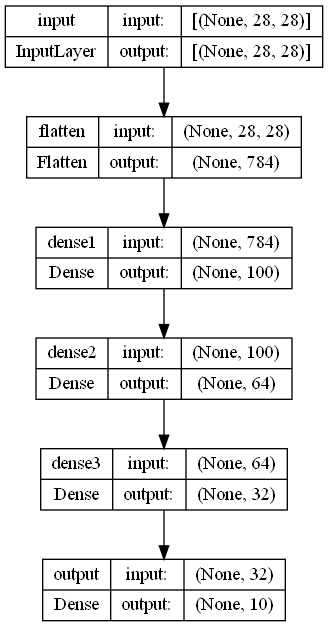

In [8]:
utils.plot_model(model, show_shapes=True, show_layer_names=True)

## 모델 컴파일 및 학습

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/40


329/329 [==============================] - 7s 11ms/step - loss: 1.7480 - accuracy: 0.4893 - val_loss: 1.0608 - val_accuracy: 0.7286
Epoch 2/40
329/329 [==============================] - 3s 8ms/step - loss: 0.7549 - accuracy: 0.7993 - val_loss: 0.5804 - val_accuracy: 0.8348
Epoch 3/40
329/329 [==============================] - 3s 10ms/step - loss: 0.4890 - accuracy: 0.8671 - val_loss: 0.4349 - val_accuracy: 0.8774
Epoch 4/40
329/329 [==============================] - 5s 16ms/step - loss: 0.3951 - accuracy: 0.8908 - val_loss: 0.3756 - val_accuracy: 0.8895
Epoch 5/40
329/329 [==============================] - 4s 13ms/step - loss: 0.3493 - accuracy: 0.9021 - val_loss: 0.3410 - val_accuracy: 0.8975
Epoch 6/40
329/329 [==============================] - 4s 13ms/step - loss: 0.3201 - accuracy: 0.9099 - val_loss: 0.3184 - val_accuracy: 0.9073
Epoch 7/40
329/329 [==============================] - 4s 11ms/step - loss: 0.2982 - accuracy: 0.9151 - val_loss: 0.3012 - val_accuracy: 0.911

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

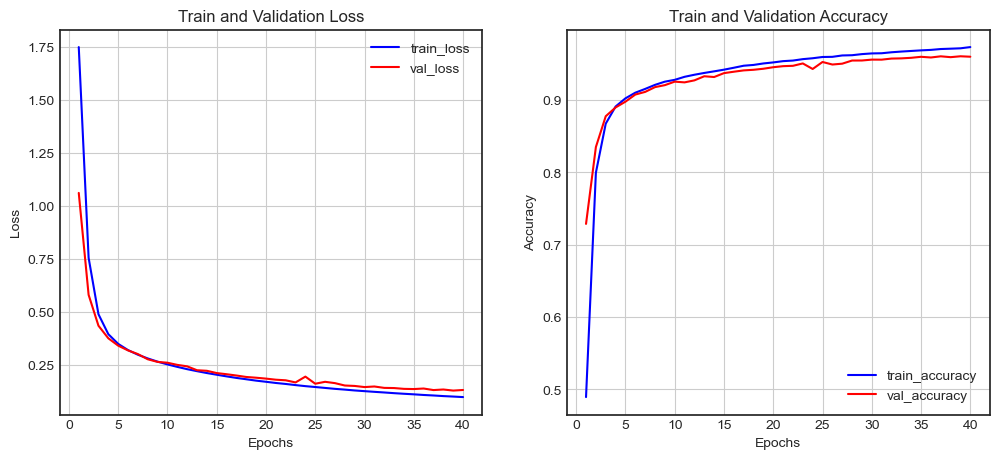

In [12]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1302 - accuracy: 0.9600


[0.13016657531261444, 0.9599999785423279]

In [14]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

313/313 [==============================] - 2s 4ms/step
(10000, 10)
[1.6779562e-05 5.5517620e-07 5.9913134e-04 6.5784151e-04 2.4361088e-07
 2.1431117e-05 2.3190080e-10 9.9856287e-01 2.0946854e-06 1.3904544e-04]


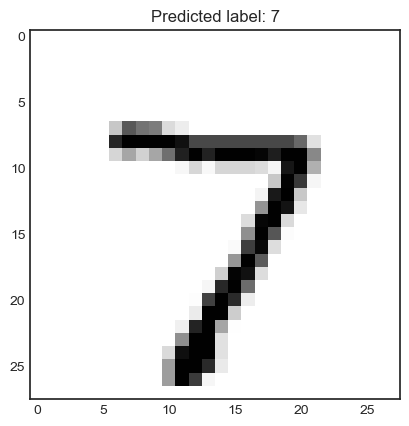

In [15]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

In [16]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.95      0.96      1032
           3       0.97      0.94      0.96      1010
           4       0.94      0.98      0.96       982
           5       0.96      0.95      0.95       892
           6       0.95      0.97      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.97      0.92      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



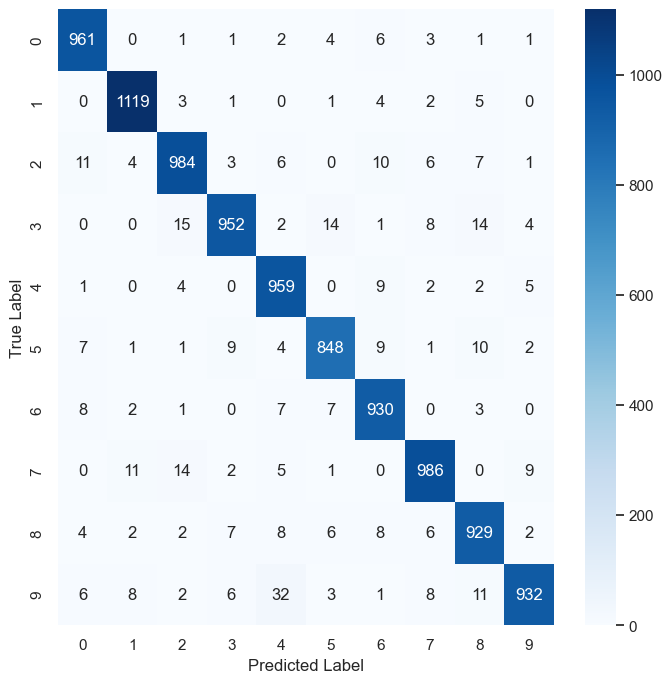

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 02 모델 저장과 로드

In [18]:
model.save('my_model.keras')  # 네이티브 Keras 형식으로 저장 (`.keras` 확장자)

In [19]:
loaded_model = models.load_model('my_model.keras')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87374 (341.30 KB)
Trainable params: 87374 (341.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)
print(pred_ys2[0])

313/313 [==============================] - 2s 5ms/step
(10000, 10)
[1.6779562e-05 5.5517620e-07 5.9913134e-04 6.5784151e-04 2.4361088e-07
 2.1431117e-05 2.3190080e-10 9.9856287e-01 2.0946854e-06 1.3904544e-04]


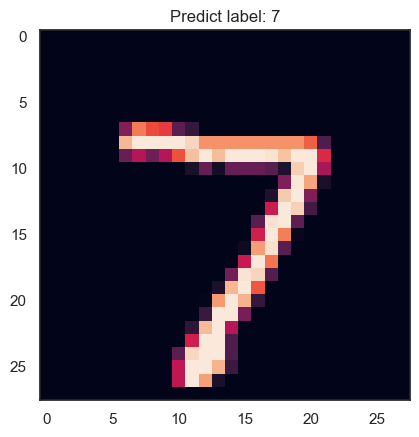

In [21]:
#예측값 시각화하기
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

#matlotlib를 이용해서 시각화하기
plt.title(f'Predict label: {arg_pred_y2[0]}')
plt.imshow(x_test[0])
plt.show()

In [22]:
# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장합니다.
model_json = model.to_json()

# json으로 저장한 모델을 읽어옵니다.
loaded_model = keras.models.model_from_json(model_json)

predictions = loaded_model.predict(x_test)
print(predictions.shape)
print(predictions[0])

313/313 [==============================] - 2s 5ms/step
(10000, 10)
[0.08819182 0.18127969 0.08178186 0.05421378 0.11665368 0.08509438
 0.11362191 0.0877807  0.10897519 0.08240701]


# 03 콜백 (Callbacks)

In [5]:
from tensorflow.keras import callbacks

## ModelCheckpoint

In [7]:
check_point_cb = callbacks.ModelCheckpoint('my_model.keras')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

Epoch 1/10


1313/1313 [==============================] - 10s 6ms/step - loss: 0.8264 - accuracy: 0.7608
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3206 - accuracy: 0.9079
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2520 - accuracy: 0.9277
Epoch 4/10
1313/1313 [==============================] - 12s 9ms/step - loss: 0.2135 - accuracy: 0.9380
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1866 - accuracy: 0.9458
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1647 - accuracy: 0.9525
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1475 - accuracy: 0.9573
Epoch 8/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1330 - accuracy: 0.9606
Epoch 9/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1216 - accuracy: 0.9641
Epoch 10/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0

In [25]:
check_point_cb = callbacks.ModelCheckpoint('my_model.keras', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0496 - accuracy: 0.9858 - val_loss: 0.0995 - val_accuracy: 0.9704
Epoch 2/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0470 - accuracy: 0.9868 - val_loss: 0.1020 - val_accuracy: 0.9703
Epoch 3/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0437 - accuracy: 0.9874 - val_loss: 0.0980 - val_accuracy: 0.9699
Epoch 4/10
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0401 - accuracy: 0.9889 - val_loss: 0.0965 - val_accuracy: 0.9711
Epoch 5/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0380 - accuracy: 0.9899 - val_loss: 0.0984 - val_accuracy: 0.9721
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0351 - accuracy: 0.9903 - val_loss: 0.0978 - val_accuracy: 0.9717
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0333 - accuracy: 0.9910 - val_loss: 0.0959 - val_accu

## EarlyStopping
---

In [10]:
check_point_cb = callbacks.ModelCheckpoint('my_model.keras', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10


1313/1313 [==============================] - 12s 8ms/step - loss: 0.8196 - accuracy: 0.7660 - val_loss: 0.4002 - val_accuracy: 0.8791
Epoch 2/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3178 - accuracy: 0.9086 - val_loss: 0.2798 - val_accuracy: 0.9154
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2538 - accuracy: 0.9264 - val_loss: 0.2420 - val_accuracy: 0.9261
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2138 - accuracy: 0.9375 - val_loss: 0.2061 - val_accuracy: 0.9372
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1879 - accuracy: 0.9469 - val_loss: 0.1949 - val_accuracy: 0.9397
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1664 - accuracy: 0.9519 - val_loss: 0.1758 - val_accuracy: 0.9464
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1508 - accuracy: 0.9567 - val_loss: 0.1595 - val_accur

## LearningRateScheduler
---

In [27]:
def scheduler(epoch, learning_rate):
  if epoch < 10:
    return learning_rate
  else:
    return learning_rate * tf.math.exp(-0.1)

In [28]:
round(model.optimizer.lr.numpy(), 5)

0.01

In [29]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00607

## Tensorboard
---

In [11]:
log_dir = 'DLOne/logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 [==============================] - 15s 11ms/step - loss: 0.1067 - accuracy: 0.9693 - val_loss: 0.1488 - val_accuracy: 0.9538
Epoch 2/30
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0990 - accuracy: 0.9724 - val_loss: 0.1288 - val_accuracy: 0.9599
Epoch 3/30
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0916 - accuracy: 0.9735 - val_loss: 0.1181 - val_accuracy: 0.9642
Epoch 4/30
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0856 - accuracy: 0.9750 - val_loss: 0.1212 - val_accuracy: 0.9619
Epoch 5/30
1313/1313 [==============================] - 11s 8ms/step - loss: 0.0796 - accuracy: 0.9770 - val_loss: 0.1137 - val_accuracy: 0.9644
Epoch 6/30
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0741 - accuracy: 0.9788 - val_loss: 0.1139 - val_accuracy: 0.9647
Epoch 7/30
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0692 - accuracy: 0.9795 - val_loss: 0.1102 - val

In [1]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}